# Machine Learning 2022-2023 - UMONS

# Bias-Variance Trade-Off.

**In this lab, we will experiment with the notorious 'Bias-Variance trade-off', a highly important concept in Machine Learning. In the context of a regression task, you've seen in the course that there exists an elegant decomposition of the MSE, which allows to illustrate to concept nicely. Contrary to previous labs in which we worked with real datasets, we will today generate our own dataset from a specified data generating process. This will enable us to estimate the bias and the variance of a given model.** 
   

**1) Import the necessary libraries.** 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

**2) Create a function 'data_generating_process' that returns the following data generating process:**

$$y = f(x) + \epsilon,$$ 

**where $f(x) = 10\text{sin}(x) + \frac{x^3}{1000} - 2x$ and $\epsilon \sim \mathcal{N}(0,10)$, i.e. $\epsilon$ is random Gaussian noise with $\mu=0$ and $\sigma = 10$.**

**The arguments of the function should be:**
- **x : an array of values on which to evaluate $f(x)$**
- **'add_noise' : a boolean. If True, the function should return $f(x) + \epsilon$, if False, it should return $y=f(x)$.**

In [3]:
def data_generating_process(x, add_noise=True):
    f = 10*np.sin(x) + np.power(x,3)/1000 - 2*x
    if add_noise:
        noise = np.random.normal(0,10, len(x))
        f = f + noise
    return f

**3) Using the 'data_generating_process' function of the previous point, compute $f(x)$ and $y$ for the array $x$ below. Then, plot $f(x)$ and $y$ them on the same figure. Use a line plot for $f(x)$, and a scatter plot for $y$.**  

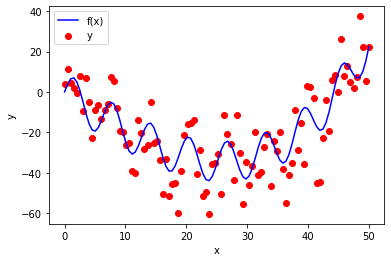

In [4]:
x = np.linspace(0,50, 100)

f = data_generating_process(x, add_noise=False)
y = data_generating_process(x, add_noise=True)

fig, ax = plt.subplots()
ax.plot(x, f, label='f(x)', color='blue')
ax.scatter(x, y, label='y', color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

**4) Fit a simple regression model to the data by following these steps:**
- **Place the arrays $x$, $y$ and $f(x)$ in a Dataframe.** 
- **Select $x$ as the predictor, $y$ as the target variable.** 
- **Perform a train/test split with ratios 0.8/0.2.**
- **Fit a simple linear regression model to the training set, and predict on the test set.**
- **Report the test MSE.**  

**5) Add the estimated regression line to the previously generated plot. You'll need to predict on the full array $x$. Does the model appear to be a good fit to the data ? How do you link this observation to the bias/variance trade-off ?** 

**6) We will now decompose our models' test MSE into a bias, variance and Bayes error term. Recall from the course that the MSE decomposition is given by:**

$$\mathbb{E}_{\mathcal{D},y,x}[(y-g(x))^2)] = \underbrace{\text{Var}(y)}_{\text{Bayes Error}} + \underbrace{\mathbb{E}_x[(f(x)-\mathbb{E}_\mathcal{D}[g(x)])^2]}_{\text{Bias}} + \underbrace{\mathbb{E}_x[\text{Var}(g(x))]}_{\text{Variance}}$$

**where $\mathcal{D}$ is a training set sampled indenpendently from $p_{x,y}$. To evaluate this expression, we will:**
- **For $j=1,...,J$, sample a dataset $\mathcal{D}_j$ containing $n$ observations $(x_i,y_i)$ from the data generating process.**
- **Split $\mathcal{D}_j$ into a training set $\mathcal{D}_{j,\text{train}}$ and a test set $\mathcal{D}_{j,\text{test}}$ containing $n_{\text{train}}$ and $n_{\text{test}}$ observations respectively.**
- **Fit the model to the training set, yielding $g_j$.**
- **Make predictions on the test set using $g_j$.**

**The above steps will allow us to obtain an estimate of the Bias Variance of the fitted models:**
$$\mathbb{E}_{\mathcal{D},y,x}[(y-g(x))^2)] \simeq \underbrace{\frac{1}{Jn_{\text{test}}} \sum_{j=1}^J \sum_{i=1}^{n_\text{test}} (y_{i,j} - \bar{y})^2}_{\text{Bayes Error}} + \underbrace{\frac{1}{n_{\text{test}}} \sum_{i=1}^{n_\text{test}} [(f(x_i) - \frac{1}{J} \sum_{j=1}^J g_j(x_i)^2)]}_{\text{Bias}} + \underbrace{\frac{1}{J n_{\text{test}}} \sum_{j=1}^J \sum_{i=1}^{n_{\text{test}}} (g_j(x_i) - \bar{g}(x_i))^2}_{\text{Variance}},$$

**where $\bar{y} = \frac{1}{Jn_{\text{test}}} \sum_{j=1}^J \sum_{i=1}^{n_\text{test}} y_{i,j}$ and $\bar{g}(x_i) = \frac{1}{J}\sum_{j=1}^J g_j(x_i)$. To this end, complete the 'bias_variance_estimator' function below, which takes as arguments:**
- **model : A scikit-learn model.**
- **num_datasets : The number of datasets the sample from the data generating process.** 

In [5]:
def bias_variance_estimator(model, num_datasets):
    predictions, targets, f_tests, errors = [], [], [], []
    x_true = np.linspace(0,50, 100)
    for _ in range(num_datasets):
        y_true = data_generating_process(x_true)
        df = pd.DataFrame(data={'x':x_true, 'y':y_true})
        x = df[['x']]
        y = df[['y']]
        X_train, X_test, y_train, y_test = train_test_split(
        x, y, train_size=0.1, test_size=0.9, shuffle=True, random_state=0)
        #Your code here
        mse = mean_squared_error(y_pred_test, y_test)
        predictions.append(y_pred_test)
        targets.append(y_test)
        f_tests.append(f_test)
        errors.append(mse)
    predictions = np.squeeze(np.array(predictions))
    targets = np.squeeze(np.array(targets))
    f_tests = np.squeeze(np.array(f_tests))
    #Your code here
    mse = np.mean(errors)
    return bias, variance, bayes_error, mse

**7) Check that your implementation of the 'bias_variance_estimator' function is correct by comparing** 
$$\text{Bayes Error} + \text{Bias} + \text{Variance}$$

**to $\frac{1}{n_\text{test}} \sum_{j=1}^J \text{MSE}_j$, where $\text{Bayes Error}$, $\text{Bias}$, and $\text{Variance}$ are returned by the 'bias_variance_estimator' function. To this end, employ a simple linear regression model, and sample 1000 datasets $\mathcal{D}_j$ from the data generating process. Does the value obtained for the Bayes Error make sense ?**
   

**8) We will now study of the bias and variance of a model evolve when varying its complexity. To this end, apply the following steps:**
- **Re-use the 'PolynomialRegression' function of Lab 4.**
- **For polynomial degrees between 1 and 7, compute the bias, variance and Bayes error of the model and put them in a list.**
- **On the same plot, show the evolution of the bias, variance and Bayes error terms as a function of the Polynomial degree.**

**What are your observation ?**

**9) Show the regression line for polynomial LinearRegression models of degrees in [1,7]. To this end, do:**
- **From the Dataframe defined in 4), select $x$ as the predictor and $y$ as the target variable.**
- **Split the dataset into training and test sets following a 01/0.9 ratio.**
- **For each polynomial degree:**
    - **Fit the model to the training set, and save it in a list 'models'.**
- **For each model in models, predict on all $x$ and plot the predictions.** 

**10) Repeat the same exercise as in 8), but for the number of neighbors in a 'KNeighborsRegressor'.**

**Are the evolution of the bias, variance and Bayes error term expected ?**